In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests

# 50 Startup Dataset 📊

This dataset contains information about 50 startups, including their R&D spend, administration spend, marketing spend, state, and profit. It is a great dataset for practicing machine learning techniques such as regression and classification.

In [4]:
path = './50_Startups.csv'
startup_df = pd.read_csv(path)

## A Guided EDA Process 🚀🔍

Exploratory Data Analysis (EDA) is an essential step in any data science project, helping us understand, clean, and gain insights from our dataset. Here's a structured EDA process to guide your data exploration:

1. **Understand Column Meanings:** Begin by comprehending the meaning of each column in your dataset. Know what each attribute represents and its significance in your analysis. This provides context for your data.

2. **Check Data Integrity:** Ensure the integrity of your dataset by inspecting for missing values (NaNs) and outliers. Addressing data quality issues is crucial to reliable analysis.

3. **Visualize Distributions:** Utilize data visualization techniques to explore the distribution of individual variables. Tools like histograms, kernel density plots, and box plots can reveal insights into the data's spread and central tendencies.

4. **Pair Plots for Relationships:** Create pair plots to visualize relationships between pairs of variables. This matrix of scatter plots helps identify correlations and patterns, aiding in understanding the data's structure.

## Understand Column Meanings 📊

In [5]:
startup_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Dataset Description 📗

Here is a more detailed explanation of each feature:

1. R&D spend: The amount of money spent on research and development. 🚀
2. Administration spend: The amount of money spent on administrative tasks such as accounting and HR. 🏢
3. Marketing spend: The amount of money spent on marketing activities such as advertising and public relations. 📣
4. State: The state in which the startup is located. 🇺🇸
5. Profit: The amount of money that the startup has made. 💰

This dataset can be used to answer a variety of questions about startups, such as:

1. What are the most important factors that influence startup profit?

2. Can we predict which startups are likely to be successful?

3. How can startups allocate their resources most effectively?


## Check Data Integrity 🔍

In [6]:
# Check for missing values
missing_values = startup_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


We are good to go! No missing values.

## Visualize Distributions 📈

### The Power of Stacking

Stacking histograms involves overlaying multiple histograms on a single graph, each representing a different subset or category of data.
The advantage is that it is possible to obtain the profile of the distribution of the variable of interest divided by the categories of the dataset.

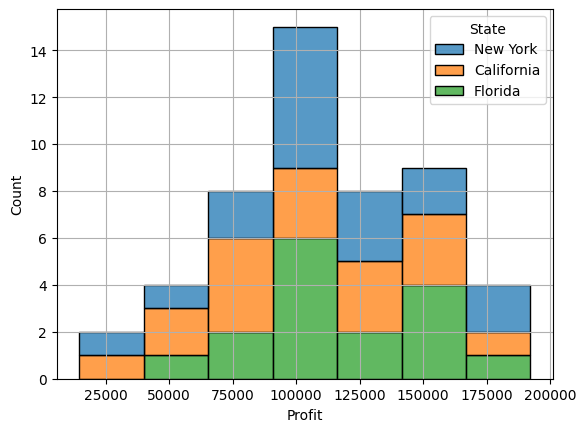

In [18]:
# Select the column you want to analyze
column_to_analyze = 'Profit'
# Plot
ax = sns.histplot(startup_df, x = column_to_analyze, hue='State', multiple='stack')

ax.grid()

## Understanding the Order of Magnitude with Log Scale
In data analysis and visualization, understanding the order of magnitude of values is crucial for making meaningful observations and comparisons. When dealing with a dataset like the one featuring 50 startups, each operating in different states with varying profit margins, gaining insights into the order of magnitude of profits can be a game-changer.

### What Is a Log Scale? 📊
A logarithmic scale, often referred to as a "log scale," is a powerful tool that represents data values on a non-linear axis. Instead of having evenly spaced intervals, a log scale divides the axis into orders of magnitude, typically in powers of 10. This type of scaling allows us to visualize data spanning a wide range of values more effectively.

### Why Use a Log Scale in Our Startup Analysis? 💼
#### Handling Profits Across States: 💰

In the case of our startup dataset, we're dealing with profits from various states, each potentially having vastly different income levels. For example, profit in California could be significantly higher than in smaller states. Using a linear scale may make it challenging to discern meaningful differences.

#### Spotting Profit Patterns: 📈

A log scale helps us emphasize relative changes in profit values rather than just absolute differences. It's ideal for highlighting variations and patterns in the order of magnitude of profits among different states.

#### Visualizing Growth Potential: 🚀

Startups often aim for exponential growth. If we were handiling a **time series**, log scale is particularly useful for visualizing data that exhibits exponential growth or decay, helping us identify which states show signs of rapid profit expansion and which might need more attention.





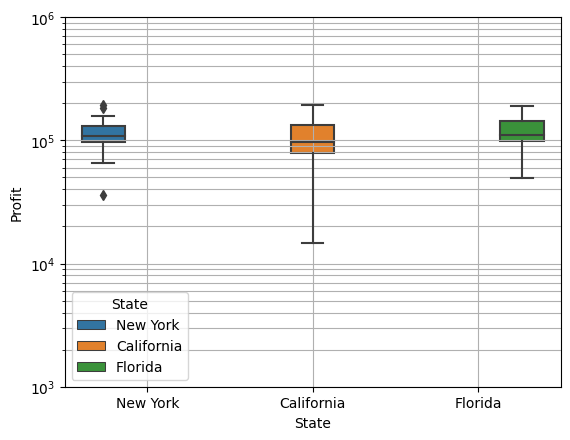

In [15]:
# Select the column you want to analyze (replace 'Per Capita' with the actual column name)
column_to_analyze = 'Profit'

ax = sns.boxplot(startup_df, x = 'State', y = column_to_analyze, hue='State')

ax.set_yscale('log')
ax.set_ylim(1e3, 1e6)
ax.grid(which='both')

## Pair Plots for Relationships 🔄

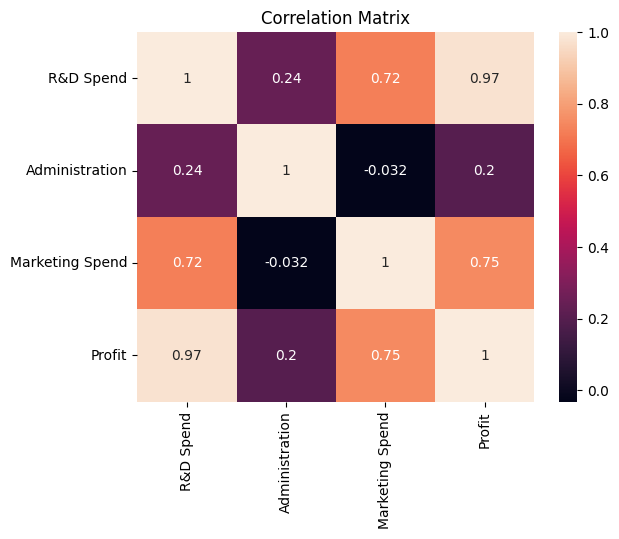

In [21]:
fig, ax = plt.subplots()

ax = sns.heatmap(startup_df.corr(numeric_only=True), annot=True)
ax.set_title('Correlation Matrix')

fig.show()

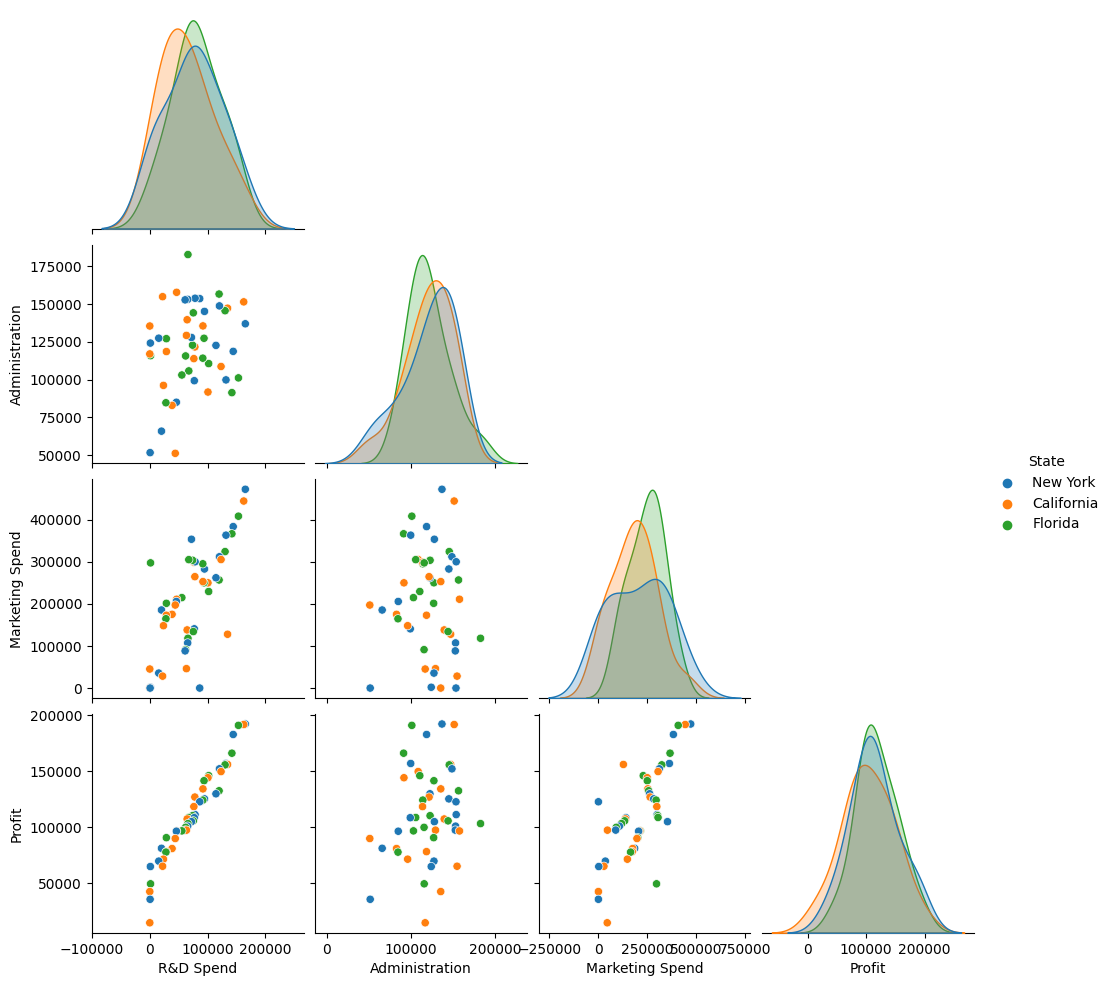

In [20]:
sns.pairplot(startup_df, hue='State', corner=True)

## Questions:
 1. Are there any dependencies with the State?
 2. If the goal is to predict the Profit as function of Administration, Marketing Spend and R&D Spend, what is the most important of these variables?


# Preprocessing ⚙️

Preprocessing is the process of preparing raw data for machine learning. It is an essential step in any machine learning project, as it can help to improve the performance and accuracy of your model.

The goal of preprocessing is to transform the raw data into a format that is more suitable for machine learning algorithms. This may involve cleaning the data, handling missing values, encoding categorical features, and scaling numerical features.

## Preprocessing with Scikit Learn 📘📙

Scikit-learn is a popular Python library for machine learning. It provides a variety of preprocessing tools that can be used to prepare data for machine learning.

1. **Cleaning the data**: This may involve removing outliers, correcting errors, and filling in missing values.
2. **Handling missing values**: There are a number of ways to handle missing values, such as dropping the samples with missing values, imputing the missing values with a mean or median value, or using a more sophisticated imputation method such as k-nearest neighbors.
3. **Encoding categorical features**: Categorical features, such as text or country names, need to be encoded into numerical values before they can be used by machine learning algorithms. Scikit-learn provides a number of encoders for categorical features, such as LabelEncoder and OneHotEncoder.
4. **Scaling numerical features**: Numerical features should be scaled so that they have a similar range of values. This helps to prevent any one feature from dominating the model. Scikit-learn provides a number of scalers for numerical features, such as StandardScaler and MinMaxScaler.


Once you have preprocessed your data, it is ready to be used to train a machine learning model. Scikit-learn provides a variety of machine learning algorithms, such as linear regression, support vector machines, and random forests.



## Encoding Categorical Variables for Machine Learning 🤖

Categorical variables are variables that have a finite set of possible values. For example, the categorical variable "color" might have the values "red", "green", and "blue".

Machine learning algorithms typically require numerical input variables. This means that categorical variables need to be encoded into numerical values before they can be used to train a machine learning model.

There are two main ways to encode categorical variables:

Label encoding: This involves assigning each category a unique integer value. For example, in the "color" example above, we could assign the integer value 1 to the category "red", the integer value 2 to the category "green", and the integer value 3 to the category "blue".
One-hot encoding: This involves creating a new binary variable for each category. For example, in the "color" example above, we would create three new binary variables: one for the category "red", one for the category "green", and one for the category "blue". Each binary variable would take on the value 1 if the sample belongs to the corresponding category, and the value 0 otherwise.

`LabelEncoding` imposes a hierarchy on the dataset and should be treated when the category has some kind of hierarchy (e.g. Danger Low, Danger Medium and Danger High can be mapped into 0, 1, 2).
In our case the categorical variable is `State`.

In [22]:
from sklearn.preprocessing import OneHotEncoder

print("Before")
print(startup_df['State'][:5])
# One Hot Encoder
encoder = OneHotEncoder()
col_out = encoder.fit_transform(startup_df[['State']])

print("After")
print(col_out[:5])

Before
0      New York
1    California
2       Florida
3      New York
4       Florida
Name: State, dtype: object
After
  (0, 2)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 1)	1.0


... or you can use the Pandas function `get_dummies`

In [24]:
pd.get_dummies(startup_df, columns=['State']).head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


## Standard Scaler for Machine Learning 📊

The standard scaler is a machine learning preprocessing technique that transforms data so that each feature has a mean of 0 and a standard deviation of 1. This is important because it helps to prevent any one feature from dominating the model.

For example, if one feature has a much larger range of values than the other features, the model may learn to focus on that feature and ignore the other features.

The standard scaler is a simple and effective way to scale numerical data. It is also very computationally efficient, making it ideal for large datasets.

In [31]:
from sklearn.preprocessing import StandardScaler

X = startup_df.drop(['Profit', 'State'], axis=1).values # We will work numpy.ndarray objects
print("Before:")
print(X[:5, :])  # Displaying the first 5 rows (axis 0) and all columns (axis 1) of the numpy.ndarray

# Scale the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

print()
print("After:")
print(X[:5, :])  # Displaying the first 5 rows (axis 0) and all columns (axis 1) of the numpy.ndarray


Before:
[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]]

After:
[[ 2.01641149  0.56075291  2.15394309]
 [ 1.95586034  1.08280658  1.9236004 ]
 [ 1.75436374 -0.72825703  1.62652767]
 [ 1.55478369 -0.09636463  1.42221024]
 [ 1.5049372  -1.07991935  1.28152771]]
